###### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('dataset/RTA Dataset.csv')

In [3]:
print(data.head(10))

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level   
0  17:02:00      Monday              18-30          Male   Above high school  \
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   
5  14:15:00      Friday              31-50          Male                 NaN   
6  17:30:00   Wednesday              18-30          Male  Junior high school   
7  17:20:00      Friday              18-30          Male  Junior high school   
8  17:20:00      Friday              18-30          Male  Junior high school   
9  17:20:00      Friday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle   
0                Employee              1-2yr      

In [4]:
print(data.columns)

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [5]:
for i in data.columns:
    print(f"Unique value in {i}:")
    print(data[i].unique(),'\n')

Unique value in Time:
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

Unique value in Day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique value in Age_band_of_driver:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique value in Sex_of_driver:
['Male' 'Female' 'Unknown'] 

Unique value in Educational_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

Unique value in Vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other'] 

Unique value in Driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

Unique value in Type_of_vehicle:
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 

Text(0, 0.5, 'Light_conditions')

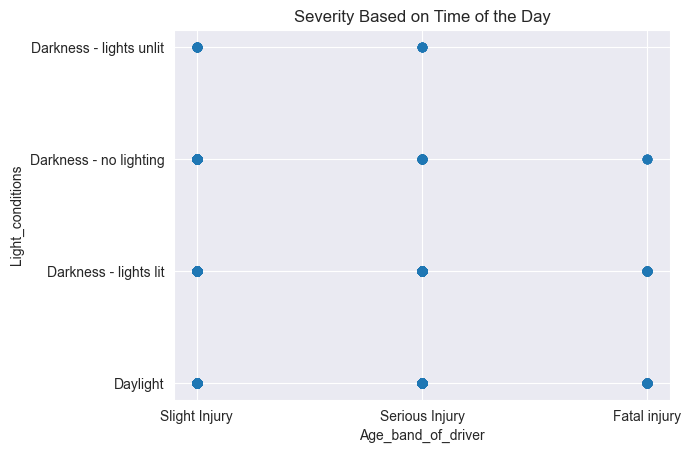

In [6]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the Accident_severity against the Light_conditions
ax.scatter(data['Accident_severity'], data['Light_conditions'])

# set a title and labels
ax.set_title('Severity Based on Time of the Day')
ax.set_xlabel('Age_band_of_driver')
ax.set_ylabel('Light_conditions')

In [7]:
print(data["Accident_severity"].value_counts())

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


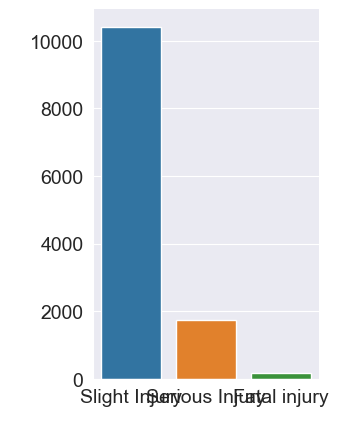

In [8]:
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=data["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

In [9]:
for columns in data.columns:
    print(f"{columns} - {data[columns].nunique()}")

Time - 1074
Day_of_week - 7
Age_band_of_driver - 5
Sex_of_driver - 3
Educational_level - 7
Vehicle_driver_relation - 4
Driving_experience - 7
Type_of_vehicle - 17
Owner_of_vehicle - 4
Service_year_of_vehicle - 6
Defect_of_vehicle - 3
Area_accident_occured - 14
Lanes_or_Medians - 7
Road_allignment - 9
Types_of_Junction - 8
Road_surface_type - 5
Road_surface_conditions - 4
Light_conditions - 4
Weather_conditions - 9
Type_of_collision - 10
Number_of_vehicles_involved - 6
Number_of_casualties - 8
Vehicle_movement - 13
Casualty_class - 4
Sex_of_casualty - 3
Age_band_of_casualty - 6
Casualty_severity - 4
Work_of_casuality - 7
Fitness_of_casuality - 5
Pedestrian_movement - 9
Cause_of_accident - 20
Accident_severity - 3


Text(0, 0.5, 'count')

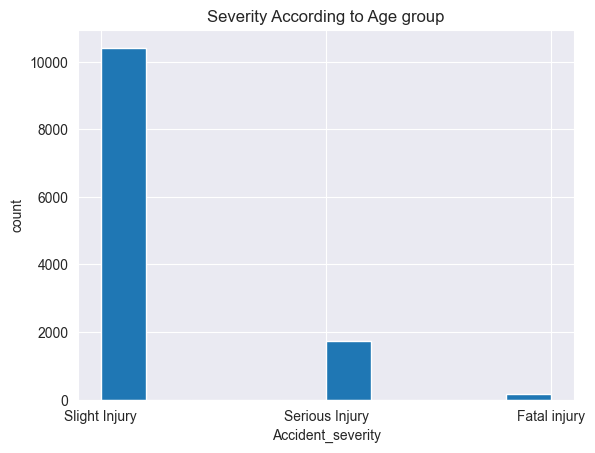

In [10]:
# create figure and axis
fig, ax = plt.subplots()

# plot histogram
ax.hist(data['Accident_severity'])

# set title and labels
ax.set_title('Severity According to Age group')
ax.set_xlabel('Accident_severity')
ax.set_ylabel("count")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [12]:
'''col_map={
    'Time': 'time'}
data.rename(columns=col_map, inplace=True)'''

"col_map={\n    'Time': 'time'}\ndata.rename(columns=col_map, inplace=True)"

In [13]:
# converting 'time' to datetime
data['Time'] = pd.to_datetime(data['Time'])

# date (day-month-year) time
data["Time"].dt.hour

# extracting hour and minute from timestamp
data['hour'] = data['Time'].dt.hour
data['minute'] = data['Time'].dt.minute
data.drop('Time', axis=1, inplace=True)

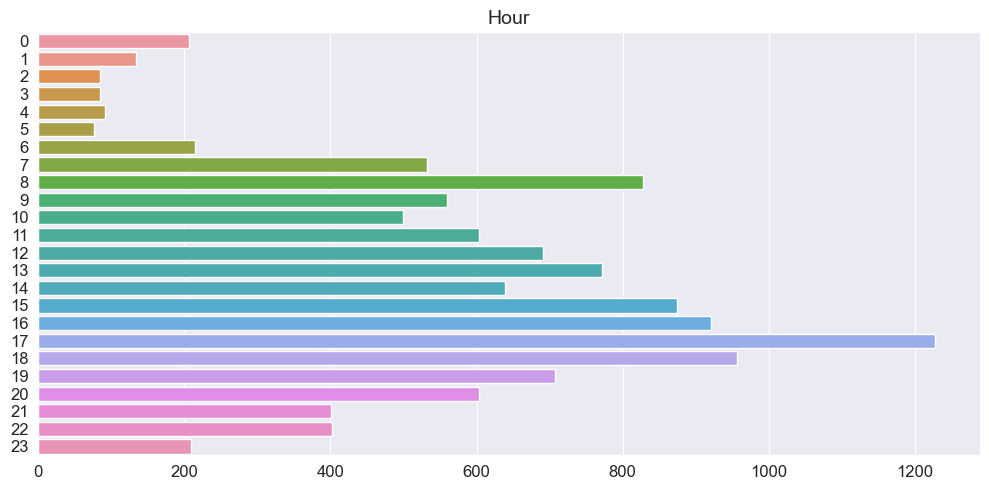

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

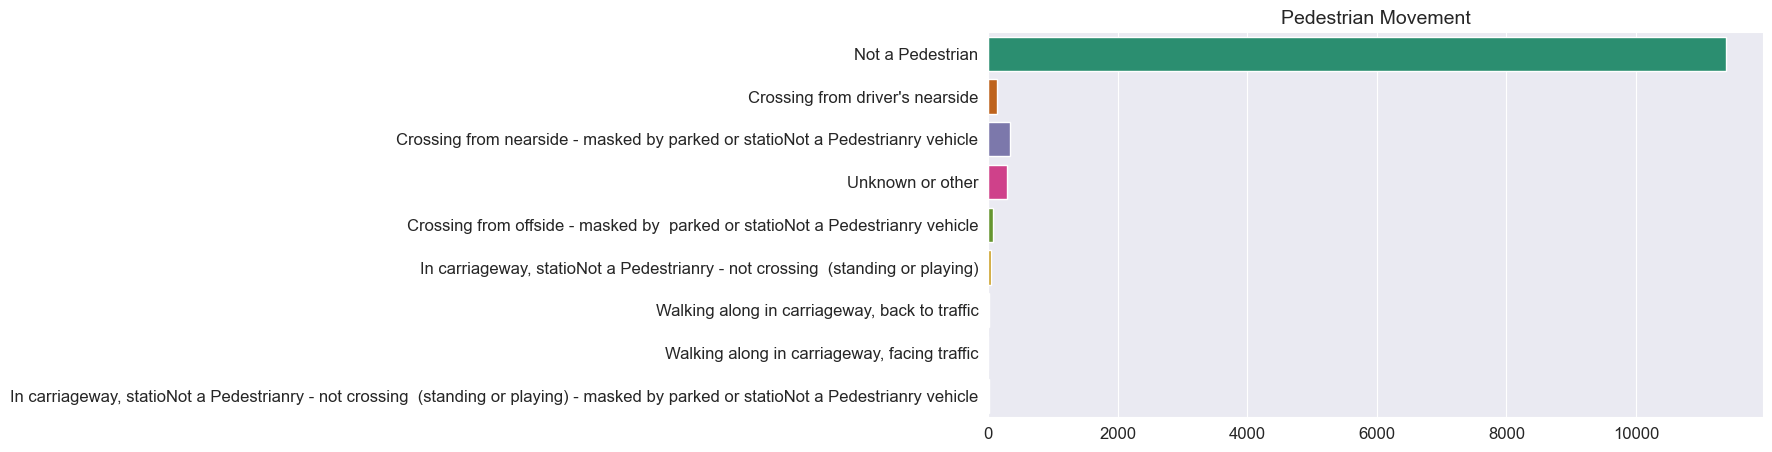

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y='Pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()